# Critical Analysis Of Web Pages

### PERFORM WEB SCRAPING ON BOOK STORE

http://books.toscrape.com

What we need:
    
    * Pages
    * Prices
    * Ratings
    * Title
    * URL's (images)
    

In [1]:
# IMPORTING REQUIRED LIBRARIES

import requests
import bs4
import pandas as pd

In [2]:
# Creating Empty Lists

pages = list()
prices = list()
ratings = list()
titles = list()
urls = list()

In [3]:
NumOfPages = 1 # number of pages to be selected

# We will loop through the required pages and selecting the pages accordingly

for page in range(1,NumOfPages+1):
    url = f'http://books.toscrape.com/catalogue/page-{page}.html'
    pages.append(url)

In [4]:
pages

['http://books.toscrape.com/catalogue/page-1.html']

In [5]:
# Getting the data from the particular page url and converting from object of type 'request' to object of type 'beautiful soup', 
# making it more readable

for item in pages:
    page = requests.get(item)
    soup = bs4.BeautifulSoup(page.text,'html.parser')

In [6]:
soup


<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:30" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="../static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="../static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link 

In [7]:
print(soup.prettify()) # Looks similar to the page source

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <title>
   All products | Books to Scrape - Sandbox
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="24th Jun 2016 09:30" name="created"/>
  <meta content="" name="description"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="NOARCHIVE,NOCACHE" name="robots"/>
  <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
  <!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
  <link href="../static/oscar/favicon.ico" rel="shortcut icon"/>
  <link href="../static/oscar/css/styles.css" rel="stylesheet" typ

In [52]:
for title in soup.select('h3'): # Get book titles, h3 when inspected the page
    titles.append(title.text)

In [53]:
titles

['A Light in the ...',
 'Tipping the Velvet',
 'Soumission',
 'Sharp Objects',
 'Sapiens: A Brief History ...',
 'The Requiem Red',
 'The Dirty Little Secrets ...',
 'The Coming Woman: A ...',
 'The Boys in the ...',
 'The Black Maria',
 'Starving Hearts (Triangular Trade ...',
 "Shakespeare's Sonnets",
 'Set Me Free',
 "Scott Pilgrim's Precious Little ...",
 'Rip it Up and ...',
 'Our Band Could Be ...',
 'Olio',
 'Mesaerion: The Best Science ...',
 'Libertarianism for Beginners',
 "It's Only the Himalayas"]

In [10]:
# Get book prices, p with class as price_color when inspected the page

for price in soup.find_all('p', class_ = 'price_color'):
    prices.append(price.text)

In [11]:
print(prices)

['Â£51.77', 'Â£53.74', 'Â£50.10', 'Â£47.82', 'Â£54.23', 'Â£22.65', 'Â£33.34', 'Â£17.93', 'Â£22.60', 'Â£52.15', 'Â£13.99', 'Â£20.66', 'Â£17.46', 'Â£52.29', 'Â£35.02', 'Â£57.25', 'Â£23.88', 'Â£37.59', 'Â£51.33', 'Â£45.17']


In [12]:
# Get book ratings, p with class as star_rating when inspected the page

for rating in soup.find_all('p', class_ = 'star-rating'):
    for k,v in rating.attrs.items():
        star = v[1]
        ratings.append(star)

In [13]:
print(ratings)

['Three', 'One', 'One', 'Four', 'Five', 'One', 'Four', 'Three', 'Four', 'One', 'Two', 'Four', 'Five', 'Five', 'Five', 'Three', 'One', 'One', 'Two', 'Two']


In [18]:
# Finding all the URL's of the images

divs = soup.find_all('div', class_ = 'image_container')

In [36]:
for img in divs:
    tags = img.find_all('img', class_= 'thumbnail')
    links = 'http://books.toscrape.com/'+ str(tags[0]['src'])
    newlinks = links.replace('../','')
    urls.append(newlinks)

In [60]:
## Data Processing on Scraped Data

WebData = {'Title':titles, 'Price':prices,'Rating':ratings, 'URL':urls}

In [61]:
WebData

{'Title': ['A Light in the ...',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History ...',
  'The Requiem Red',
  'The Dirty Little Secrets ...',
  'The Coming Woman: A ...',
  'The Boys in the ...',
  'The Black Maria',
  'Starving Hearts (Triangular Trade ...',
  "Shakespeare's Sonnets",
  'Set Me Free',
  "Scott Pilgrim's Precious Little ...",
  'Rip it Up and ...',
  'Our Band Could Be ...',
  'Olio',
  'Mesaerion: The Best Science ...',
  'Libertarianism for Beginners',
  "It's Only the Himalayas"],
 'Price': ['Â£51.77',
  'Â£53.74',
  'Â£50.10',
  'Â£47.82',
  'Â£54.23',
  'Â£22.65',
  'Â£33.34',
  'Â£17.93',
  'Â£22.60',
  'Â£52.15',
  'Â£13.99',
  'Â£20.66',
  'Â£17.46',
  'Â£52.29',
  'Â£35.02',
  'Â£57.25',
  'Â£23.88',
  'Â£37.59',
  'Â£51.33',
  'Â£45.17'],
 'Rating': ['Three',
  'One',
  'One',
  'Four',
  'Five',
  'One',
  'Four',
  'Three',
  'Four',
  'One',
  'Two',
  'Four',
  'Five',
  'Five',
  'Five',
  'Three',
  'One',
  'One',

In [57]:
print(len(ratings))
print(len(titles))
print(len(prices))
print(len(urls))

20
20
20
20


In [65]:
wData = pd.DataFrame(WebData)
wData

,Title,Price,Rating,URL
0,A Light in the ...,Â£51.77,Three,http://books.toscrape.com/media/cache/2c/da/2c...
1,Tipping the Velvet,Â£53.74,One,http://books.toscrape.com/media/cache/26/0c/26...
2,Soumission,Â£50.10,One,http://books.toscrape.com/media/cache/3e/ef/3e...
3,Sharp Objects,Â£47.82,Four,http://books.toscrape.com/media/cache/32/51/32...
4,Sapiens: A Brief History ...,Â£54.23,Five,http://books.toscrape.com/media/cache/be/a5/be...
5,The Requiem Red,Â£22.65,One,http://books.toscrape.com/media/cache/68/33/68...
6,The Dirty Little Secrets ...,Â£33.34,Four,http://books.toscrape.com/media/cache/92/27/92...
7,The Coming Woman: A ...,Â£17.93,Three,http://books.toscrape.com/media/cache/3d/54/3d...
8,The Boys in the ...,Â£22.60,Four,http://books.toscrape.com/media/cache/66/88/66...
9,The Black Maria,Â£52.15,One,http://books.toscrape.com/media/cache/58/46/58...


In [69]:
wData.Price = wData.Price.str.replace('Â£','')

In [70]:
wData

,Title,Price,Rating,URL
0,A Light in the ...,51.77,Three,http://books.toscrape.com/media/cache/2c/da/2c...
1,Tipping the Velvet,53.74,One,http://books.toscrape.com/media/cache/26/0c/26...
2,Soumission,50.10,One,http://books.toscrape.com/media/cache/3e/ef/3e...
3,Sharp Objects,47.82,Four,http://books.toscrape.com/media/cache/32/51/32...
4,Sapiens: A Brief History ...,54.23,Five,http://books.toscrape.com/media/cache/be/a5/be...
5,The Requiem Red,22.65,One,http://books.toscrape.com/media/cache/68/33/68...
6,The Dirty Little Secrets ...,33.34,Four,http://books.toscrape.com/media/cache/92/27/92...
7,The Coming Woman: A ...,17.93,Three,http://books.toscrape.com/media/cache/3d/54/3d...
8,The Boys in the ...,22.60,Four,http://books.toscrape.com/media/cache/66/88/66...
9,The Black Maria,52.15,One,http://books.toscrape.com/media/cache/58/46/58...


In [72]:
# Sorting the dataset by price

wData.sort_values('Price', ascending=False, inplace=True)

In [73]:
wData

,Title,Price,Rating,URL
15,Our Band Could Be ...,57.25,Three,http://books.toscrape.com/media/cache/54/60/54...
4,Sapiens: A Brief History ...,54.23,Five,http://books.toscrape.com/media/cache/be/a5/be...
1,Tipping the Velvet,53.74,One,http://books.toscrape.com/media/cache/26/0c/26...
13,Scott Pilgrim's Precious Little ...,52.29,Five,http://books.toscrape.com/media/cache/94/b1/94...
9,The Black Maria,52.15,One,http://books.toscrape.com/media/cache/58/46/58...
0,A Light in the ...,51.77,Three,http://books.toscrape.com/media/cache/2c/da/2c...
18,Libertarianism for Beginners,51.33,Two,http://books.toscrape.com/media/cache/0b/bc/0b...
2,Soumission,50.10,One,http://books.toscrape.com/media/cache/3e/ef/3e...
3,Sharp Objects,47.82,Four,http://books.toscrape.com/media/cache/32/51/32...
19,It's Only the Himalayas,45.17,Two,http://books.toscrape.com/media/cache/27/a5/27...


In [76]:
wData.Rating.unique()

array(['Three', 'Five', 'One', 'Two', 'Four'], dtype=object)

In [77]:
wData.Rating = wData.Rating.map({'Three':3, 'Five':5, 'One':1, 'Two':2, 'Four':4})

In [79]:
wData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 15 to 10
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   20 non-null     object
 1   Price   20 non-null     object
 2   Rating  20 non-null     int64 
 3   URL     20 non-null     object
dtypes: int64(1), object(3)
memory usage: 800.0+ bytes


In [81]:
wData.Price = wData.Price.astype(float)

In [82]:
wData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 15 to 10
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   20 non-null     object 
 1   Price   20 non-null     float64
 2   Rating  20 non-null     int64  
 3   URL     20 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 800.0+ bytes


In [84]:
# Checking correlation between the ratings of the product and the price

wData[['Price','Rating']].corr()

,Price,Rating
Price,1.000000,-0.075857
Rating,-0.075857,1.000000


<AxesSubplot:>

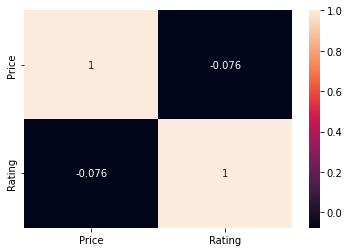

In [85]:
import seaborn as sns

sns.heatmap(wData[['Price','Rating']].corr(), annot=True)